In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [12]:
print(df.head())
print(df.info())
print(df.describe())

   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975                         0           4766.648001   
4      4700614                         1           1345.827718   

   total_debt_outstanding       income  years_employed  fico_score  default  
0             3915.471226  78039.38546               5         605        0  
1             8228.752520  26648.43525               2         572        1  
2             2027.830850  65866.71246               4         602        0  
3             2501.730397  74356.88347               5         612        0  
4             1768.826187  23448.32631               6         631        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                 

C:\Users\rapha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


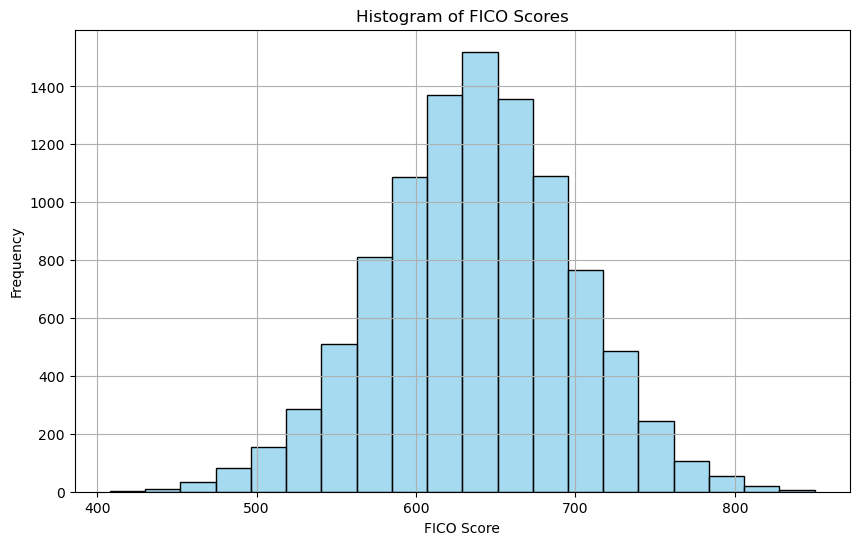

C:\Users\rapha\AppData\Local\Temp\ipykernel_18120\105323932.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['fico_score'], color='skyblue', shade=True)
C:\Users\rapha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


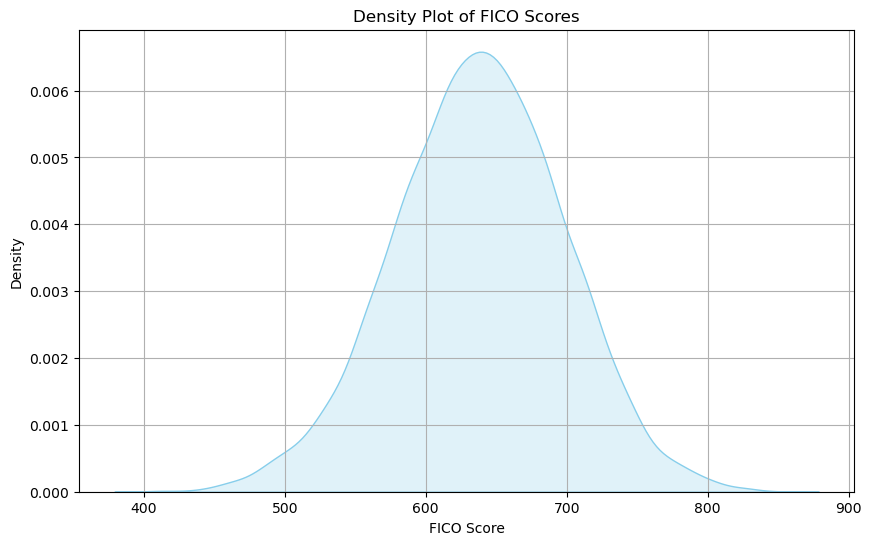

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize the distribution with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['fico_score'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the distribution with a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['fico_score'], color='skyblue', shade=True)
plt.title('Density Plot of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [32]:
defaulters = df[df['default'] == 1]

In [33]:
import numpy as np

# Calculate the number of bins using Sturges' formula
num_bins_sturges = int(np.ceil(np.log2(len(defaulters)) + 1))

print("Number of bins (Sturges' formula):", num_bins_sturges)


Number of bins (Sturges' formula): 12


C:\Users\rapha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


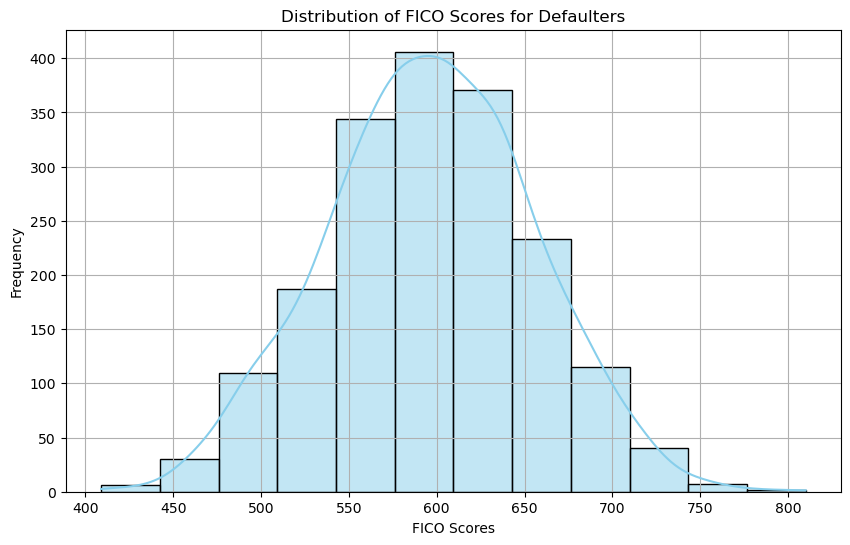

In [35]:
# Filter the dataset to include only rows where default is 1 (indicating default)
defaulters = df[df['default'] == 1]

# Plot the distribution of FICO scores for defaulters
plt.figure(figsize=(10, 6))
sns.histplot(defaulters['fico_score'], bins=12, kde=True, color='skyblue')
plt.title('Distribution of FICO Scores for Defaulters')
plt.xlabel('FICO Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Creating buckets

In [14]:
# Find the lowest FICO score
lowest_fico_score = min(df['fico_score'])

# Print the lowest FICO score
print("Lowest FICO score:", lowest_fico_score)

Lowest FICO score: 408


In [15]:
# ensuring the highest FICO score is 850
lowest_fico_score = max(df['fico_score'])

print("Highest FICO score:", lowest_fico_score)

Highest FICO score: 850


In [44]:
import pandas as pd


# Define the number of quantiles (deciles = 10)
num_quantiles = 10

# Use qcut to divide the data into deciles
df['fico_decile'] = pd.qcut(df['fico_score'], num_quantiles, labels=False, duplicates='drop')

# Display the decile boundaries and the counts in each decile
decile_boundaries = pd.qcut(df['fico_score'], num_quantiles, retbins=True, duplicates='drop')[1]
decile_counts = df['fico_decile'].value_counts().sort_index()

print("Decile Boundaries:")
for i, boundary in enumerate(decile_boundaries):
    print(f"Decile {i+1}: {boundary}")

print("\nCount of Data Points in Each Decile:")
for decile, count in decile_counts.items():
    print(f"Decile {decile + 1}: {count}")


Decile Boundaries:
Decile 1: 408.0
Decile 2: 560.0
Decile 3: 587.0
Decile 4: 607.0
Decile 5: 623.0
Decile 6: 638.0
Decile 7: 653.0
Decile 8: 670.0
Decile 9: 688.0
Decile 10: 714.0
Decile 11: 850.0

Count of Data Points in Each Decile:
Decile 1: 1017
Decile 2: 1033
Decile 3: 987
Decile 4: 984
Decile 5: 992
Decile 6: 997
Decile 7: 1027
Decile 8: 970
Decile 9: 1005
Decile 10: 988


## Analyzing the buckets

In [63]:
# Count the number of rows with the value 1 in the 'default' column per bucket (decile)
default_counts_per_decile = df[df['default'] == 1].groupby('fico_decile').size()

# Print the counts per bucket
print("Number of Defaulted Loans per Decile:")
print(default_counts_per_decile)


Number of Defaulted Loans per Decile:
fico_decile
0    499
1    318
2    246
3    179
4    173
5    128
6    108
7     92
8     72
9     36
dtype: int64


In [69]:
# Calculate the percentage of defaulted loans per decile
default_percentage_per_decile = (default_counts_per_decile / decile_counts) * 100

# Print the percentage of defaulted loans per decile
print("Percentage of Defaulted Loans per Decile:")
print(default_percentage_per_decile)


Percentage of Defaulted Loans per Decile:
fico_decile
0    49.065880
1    30.784124
2    24.924012
3    18.191057
4    17.439516
5    12.838516
6    10.516066
7     9.484536
8     7.164179
9     3.643725
dtype: float64


## Trying to predict probability of default

In [75]:
def predict_default_probability(fico_score, df):
    # Find the decile corresponding to the FICO score
    decile = df.loc[df['fico_score'] == fico_score, 'fico_decile'].values[0]
    # Check if the decile is within the range of available data
    if decile not in default_percentage_per_decile.index:
        print("FICO score is out of range for available deciles.")
        return None
    # Retrieve the default percentage for the corresponding decile
    default_percentage = default_percentage_per_decile[decile]
    # Convert default percentage to probability
    default_probability = default_percentage / 100
    return default_probability

# Example usage:
fico_score = 720
default_probability = predict_default_probability(fico_score, df)
print("Predicted Default Probability: {:.2f}%".format(default_probability * 100))

Predicted Default Probability: 3.64%
